**Preparing for data collecting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Improting necessary Libraries**

In [2]:
import pandas as pd
import numpy as np

**Load dataset**

In [3]:
gold = pd.read_csv("/content/drive/MyDrive/Gold Price Prediction Dataset.csv", delimiter=",")

gold['Date'] = pd.to_datetime(gold['Date'], format='%d-%m-%y')

#Removing null values

In [4]:
gold.dropna(inplace=True)

#Removing duplicate rows (if present)

In [5]:
gold.duplicated().sum() #no duplicate found; so nothing removed

0

#Handling categorical variables

In [6]:
gold = pd.get_dummies(gold, columns=['EU_Trend', 'OF_Trend'])

#Scale featuring

In [7]:
X = gold.drop('Adj Close', axis=1)
y = gold['Adj Close']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume']

X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])

X_test[scaled_columns] = scaler.transform(X_test[scaled_columns])

print("Per-feature minimum after scaling:\n", X_train[scaled_columns].min(axis=0))
print("Per-feature maximum after scaling:\n", X_train[scaled_columns].max(axis=0))

Per-feature minimum after scaling:
 Open        -1.502660
High        -1.519915
Low         -1.522109
Close       -1.526079
Volume      -1.384082
SP_open     -1.930776
SP_high     -1.939469
SP_low      -1.964517
SP_close    -1.974462
OF_Price    -1.805794
OF_Open     -1.806156
OF_High     -1.807619
OF_Low      -1.806407
OF_Volume   -2.436831
dtype: float64
Per-feature maximum after scaling:
 Open          2.677738
High          2.681978
Low           2.713715
Close         2.702393
Volume       17.027640
SP_open       1.992387
SP_high       1.985758
SP_low        1.996706
SP_close      2.006785
OF_Price      1.830842
OF_Open       1.830153
OF_High       1.831180
OF_Low        1.824804
OF_Volume     3.832453
dtype: float64


#Removing features

In [8]:
# Correlation analysis
correlation_matrix = gold.corr()
quality_corr = correlation_matrix['Adj Close'].sort_values(ascending=False)
print("Correlation of features with 'Adj Close':\n", quality_corr)

# Drop features with a correlation below the threshold of 0.3
threshold = 0.3
drop_features = quality_corr[abs(quality_corr) < threshold].index
gold_dropped = gold.drop(drop_features, axis=1)
print("Features dropped due to low correlation:\n", drop_features)
print(gold_dropped.head())

Correlation of features with 'Adj Close':
 Close         1.000000
Adj Close     1.000000
High          0.999528
Low           0.999524
Open          0.998966
OF_High       0.704934
OF_Price      0.704395
OF_Open       0.702735
OF_Low        0.701914
Volume        0.245870
OF_Trend_A    0.046419
EU_Trend_A    0.018724
EU_Trend_B   -0.018724
OF_Trend_B   -0.046419
OF_Volume    -0.213694
SP_Ajclose   -0.654001
SP_low       -0.671783
SP_close     -0.672353
SP_open      -0.672677
SP_high      -0.672963
Date         -0.674981
Name: Adj Close, dtype: float64
Features dropped due to low correlation:
 Index(['Volume', 'OF_Trend_A', 'EU_Trend_A', 'EU_Trend_B', 'OF_Trend_B',
       'OF_Volume'],
      dtype='object')
         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  15

**Plotting**

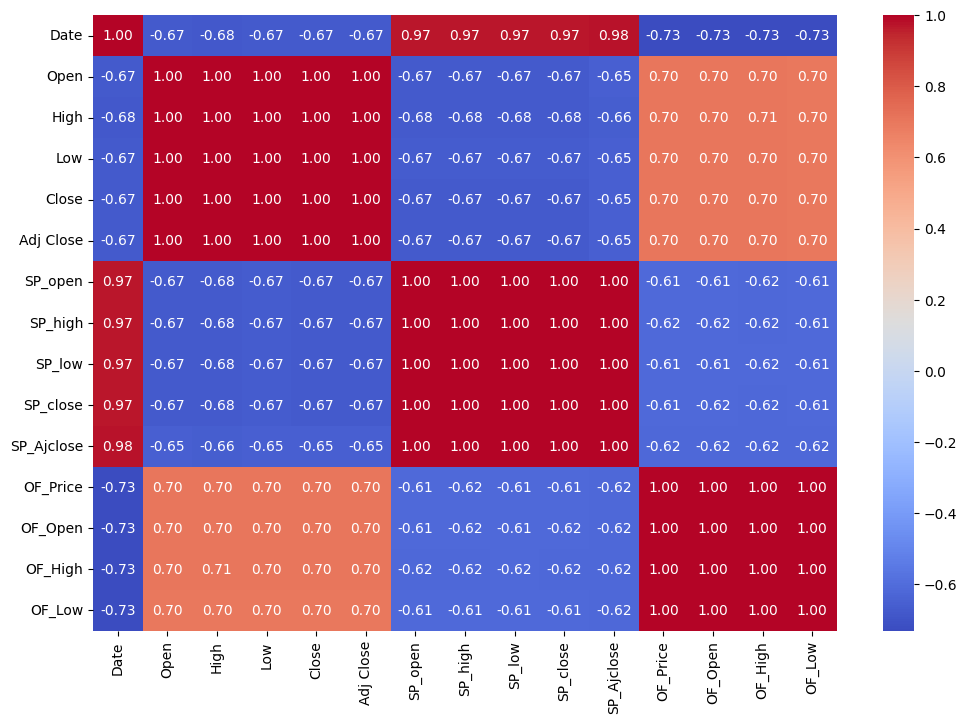

In [9]:
correlation_matrix_dropped = gold_dropped.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_dropped, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()